In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("D:\Datasets\Farnaz\genomefinal.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592578 entries, 0 to 592577
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   # rsid                  592578 non-null  object 
 1   chromosome              592578 non-null  object 
 2   position                592578 non-null  int64  
 3   genotype                592578 non-null  object 
 4   disease_status          592578 non-null  int64  
 5   Sequencing_Type         592578 non-null  object 
 6   Sequencing_Coverage     592578 non-null  float64
 7   GeneA_Expression        592578 non-null  object 
 8   GeneB_Expression        592578 non-null  object 
 9   GeneC_Expression        592578 non-null  object 
 10  GeneD_Expression        592578 non-null  object 
 11  GeneE_Expression        592578 non-null  object 
 12  Medical_History         592578 non-null  object 
 13  Current_Medications     592578 non-null  object 
 14  Allergies           

In [10]:
df.shape

(592578, 39)

In [11]:
subset_df = df.iloc[:10000]

In [12]:
subset_df.shape

(10000, 39)

In [14]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   # rsid                  10000 non-null  object 
 1   chromosome              10000 non-null  object 
 2   position                10000 non-null  int64  
 3   genotype                10000 non-null  object 
 4   disease_status          10000 non-null  int64  
 5   Sequencing_Type         10000 non-null  object 
 6   Sequencing_Coverage     10000 non-null  float64
 7   GeneA_Expression        10000 non-null  object 
 8   GeneB_Expression        10000 non-null  object 
 9   GeneC_Expression        10000 non-null  object 
 10  GeneD_Expression        10000 non-null  object 
 11  GeneE_Expression        10000 non-null  object 
 12  Medical_History         10000 non-null  object 
 13  Current_Medications     10000 non-null  object 
 14  Allergies               10000 non-null 

# Data Cleaning and Preprocessing

Checking for missing values and imputing the missing values.

In [17]:
# Impute missing values for the categorical columns
categorical_columns_with_missing = ['Dietary_Restrictions', 'Relative_Disease', 'Health_Goals']

# Using the most frequent value for imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
subset_df[categorical_columns_with_missing] = categorical_imputer.fit_transform(subset_df[categorical_columns_with_missing])

# Check if the missing values have been imputed
subset_df[categorical_columns_with_missing].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Dietary_Restrictions  10000 non-null  object
 1   Relative_Disease      10000 non-null  object
 2   Health_Goals          10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


## Data Type Conversion
Checking which columns can be converted into categorical columns

In [18]:
# Extracting columns of type 'object'
object_columns = subset_df.select_dtypes(include=['object']).columns

# Checking unique values in each object column
for col in object_columns:
    unique_values = subset_df[col].nunique()
    total_values = len(subset_df[col])
    if unique_values < total_values * 0.05:  # Assuming a threshold of 5% unique values
        print(f"Column '{col}' has {unique_values} unique values out of {total_values} total values.")

Column 'chromosome' has 1 unique values out of 10000 total values.
Column 'genotype' has 12 unique values out of 10000 total values.
Column 'Sequencing_Type' has 2 unique values out of 10000 total values.
Column 'GeneA_Expression' has 3 unique values out of 10000 total values.
Column 'GeneB_Expression' has 3 unique values out of 10000 total values.
Column 'GeneC_Expression' has 3 unique values out of 10000 total values.
Column 'GeneD_Expression' has 3 unique values out of 10000 total values.
Column 'GeneE_Expression' has 3 unique values out of 10000 total values.
Column 'Current_Medications' has 100 unique values out of 10000 total values.
Column 'Allergies' has 81 unique values out of 10000 total values.
Column 'Diet' has 4 unique values out of 10000 total values.
Column 'Dietary_Restrictions' has 3 unique values out of 10000 total values.
Column 'Exercise_Frequency' has 4 unique values out of 10000 total values.
Column 'Exercise_Type' has 4 unique values out of 10000 total values.
Co

In [19]:
# Columns to be converted to 'category' data type
cols_to_convert = [
    'chromosome', 'genotype', 'Sequencing_Type', 'GeneA_Expression', 'GeneB_Expression',
    'GeneC_Expression', 'GeneD_Expression', 'GeneE_Expression', 'Diet', 'Dietary_Restrictions',
    'Exercise_Frequency', 'Exercise_Type', 'Tobacco_Use', 'Alcohol_Use', 'Aspirin_Response',
    'Metformin_Response', 'Lisinopril_Response', 'Atorvastatin_Response', 'Relative_Disease',
    'Exposure_Air_Pollution', 'Exposure_Pesticides', 'Exposure_Heavy_Metals', 'Employment_Status',
    'Education_Level', 'Stress_Level', 'Medication_Adherence', 'Treatment_Preference', 'Health_Goals',
    'Gut_Microbiota_Profile'
]

# Converting to 'category'
subset_df[cols_to_convert] = subset_df[cols_to_convert].astype('category')

## Outlier Dectection and Handling

In [21]:
import numpy as np
numerical_columns = ['position', 'Sequencing_Coverage', 'Exercise_Duration', 'Cigarettes_Per_Day', 'Average_Sleep']

for col in numerical_columns:
    Q1 = subset_df[col].quantile(0.25)
    Q3 = subset_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = subset_df[(subset_df[col] < lower_bound) | (subset_df[col] > upper_bound)]

    # For this example, we'll cap the outliers to the bounds.
    subset_df[col] = np.where(subset_df[col] < lower_bound, lower_bound, subset_df[col])
    subset_df[col] = np.where(subset_df[col] > upper_bound, upper_bound, subset_df[col])

    print(f"Column: {col}, Number of Outliers Detected: {len(outliers)}")

Column: position, Number of Outliers Detected: 0
Column: Sequencing_Coverage, Number of Outliers Detected: 0
Column: Exercise_Duration, Number of Outliers Detected: 0
Column: Cigarettes_Per_Day, Number of Outliers Detected: 0
Column: Average_Sleep, Number of Outliers Detected: 0


In [23]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   # rsid                  10000 non-null  object  
 1   chromosome              10000 non-null  category
 2   position                10000 non-null  float64 
 3   genotype                10000 non-null  category
 4   disease_status          10000 non-null  int64   
 5   Sequencing_Type         10000 non-null  category
 6   Sequencing_Coverage     10000 non-null  float64 
 7   GeneA_Expression        10000 non-null  category
 8   GeneB_Expression        10000 non-null  category
 9   GeneC_Expression        10000 non-null  category
 10  GeneD_Expression        10000 non-null  category
 11  GeneE_Expression        10000 non-null  category
 12  Medical_History         10000 non-null  object  
 13  Current_Medications     10000 non-null  object  
 14  Allergies              

# Exploratory Data Analysis

## Summary Statistics

In this section we will try to obtain the statistican summaries for both numerical and categorical columns

In [24]:
# Extracting numerical columns
numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns

# Getting summary statistics for numerical columns
numerical_summary = subset_df[numerical_cols].describe()

numerical_summary

,position,disease_status,Sequencing_Coverage,Exercise_Duration,Cigarettes_Per_Day,Average_Sleep
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.331865e+07,0.329400,95.060747,64.837500,5.071100,7.499000
std,1.380346e+07,0.470019,2.896144,31.804604,7.778091,2.288738
min,7.344620e+05,0.000000,90.001194,10.000000,0.000000,4.000000
25%,1.171156e+07,0.000000,92.579328,37.000000,0.000000,6.000000
50%,2.188969e+07,0.000000,95.079016,66.000000,0.000000,7.000000
75%,3.504752e+07,1.000000,97.572006,92.000000,17.000000,9.000000
max,4.868224e+07,1.000000,99.999680,119.000000,17.000000,11.000000


## Histograms for Numerical columns

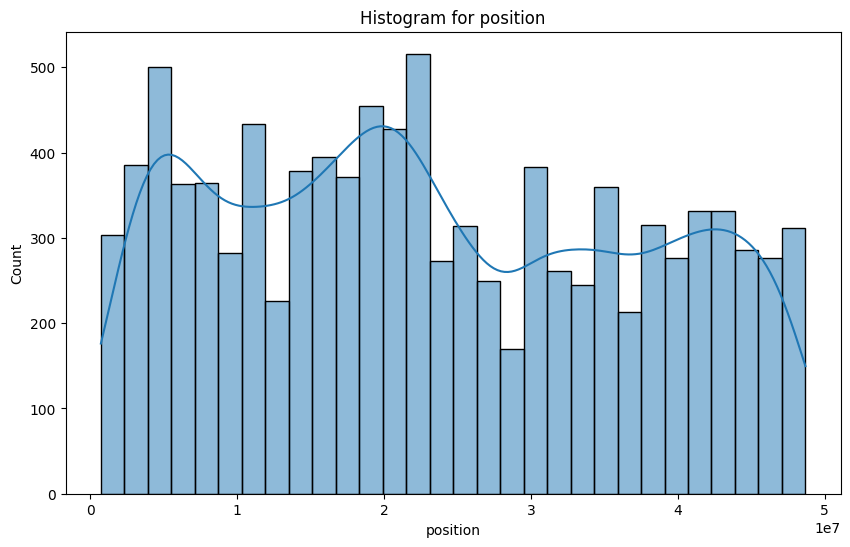

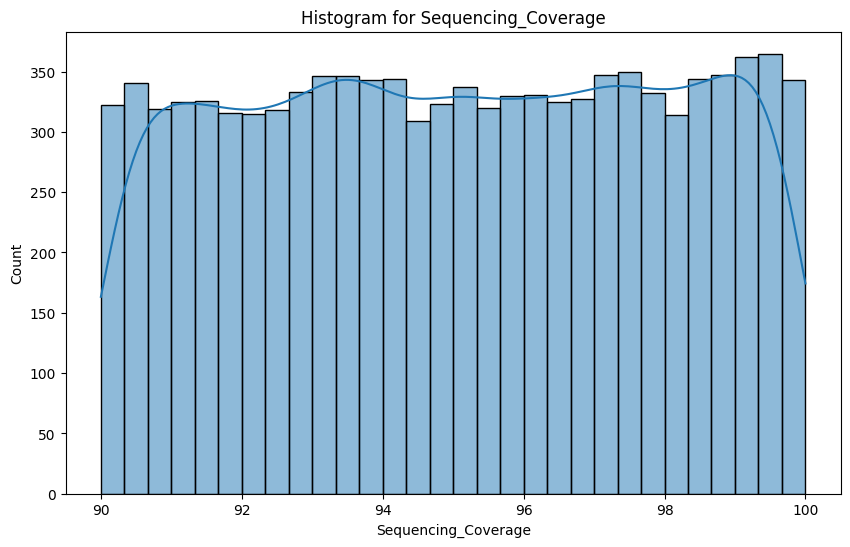

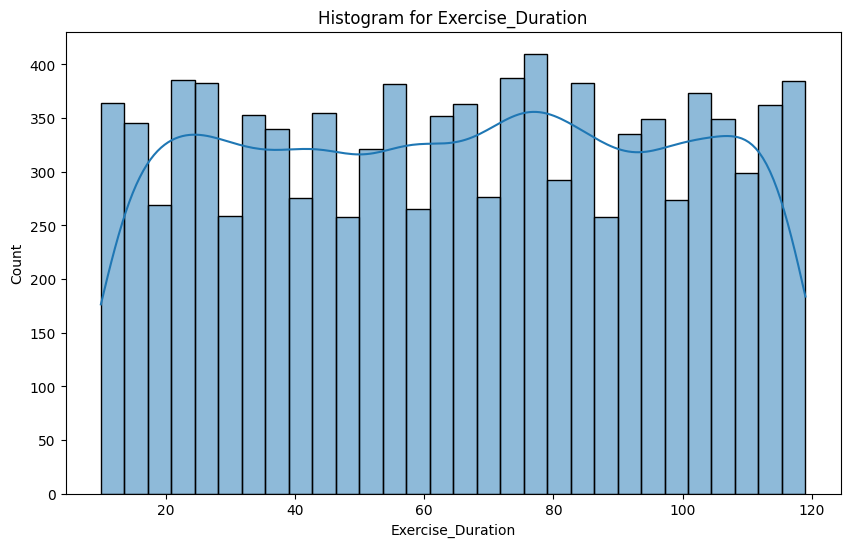

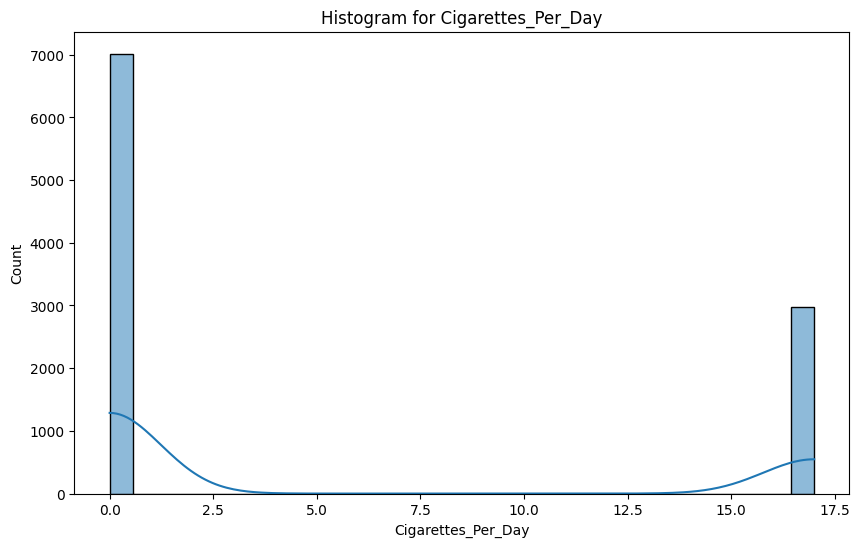

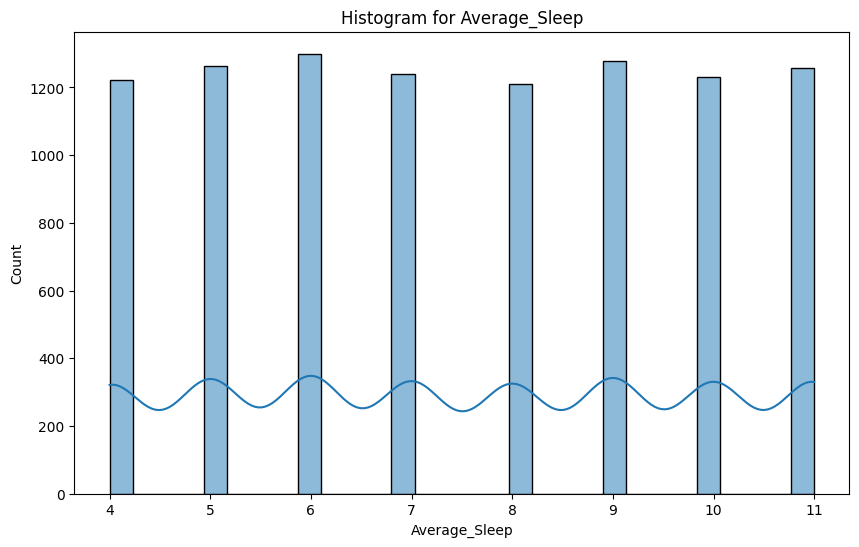

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['position', 'Sequencing_Coverage', 'Exercise_Duration', 'Cigarettes_Per_Day', 'Average_Sleep']

# Plotting histograms for each column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(subset_df[col], bins=30, kde=True)
    plt.title(f'Histogram for {col}')
    plt.show()

## Box Plots for Numerical Columns

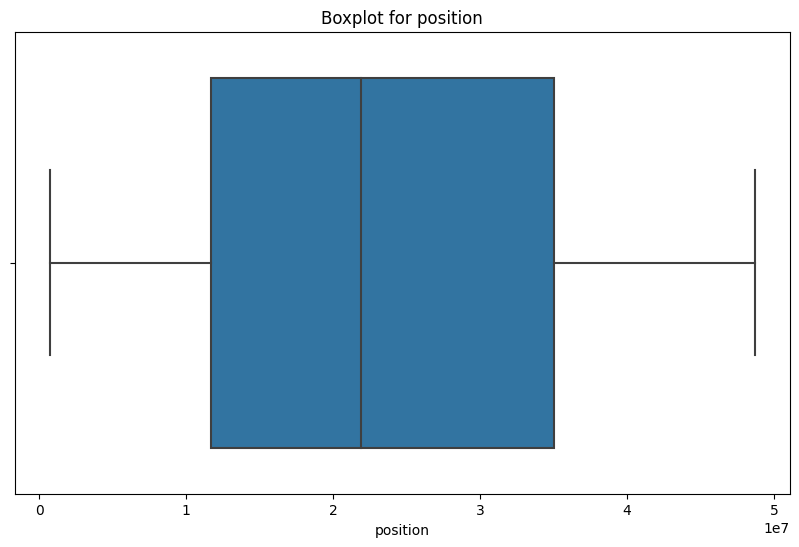

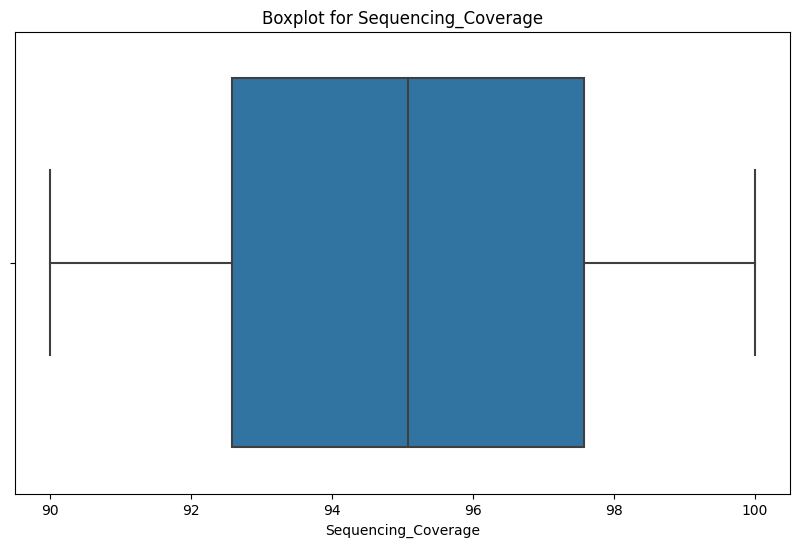

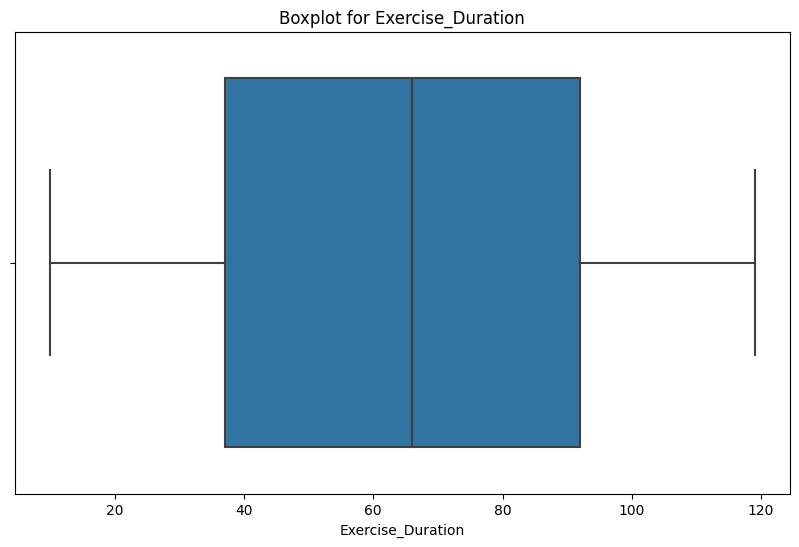

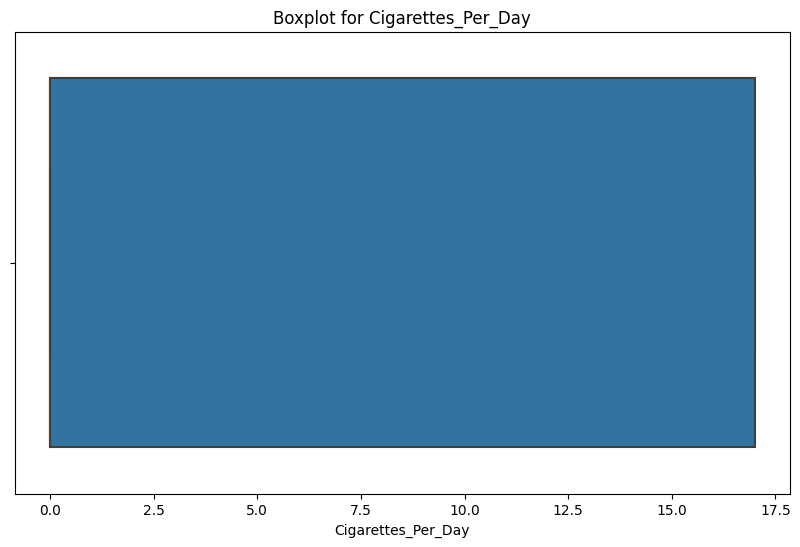

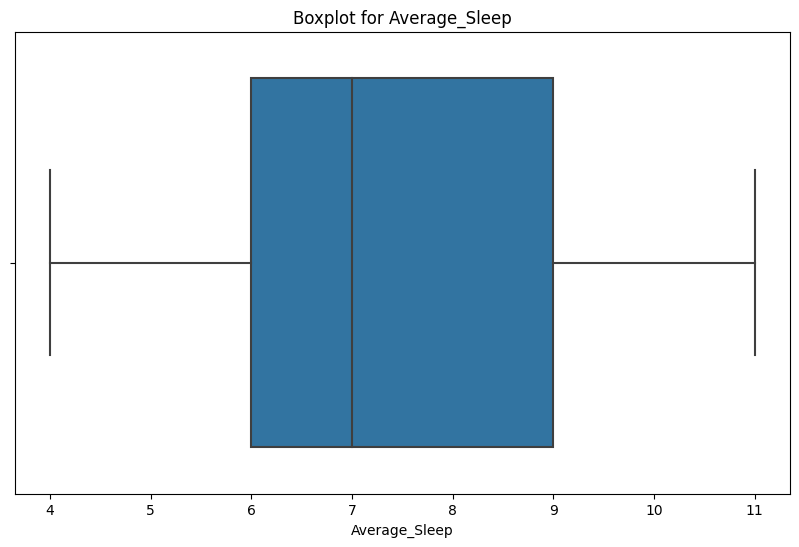

In [33]:
# Plotting boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=subset_df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Correlation Matrix

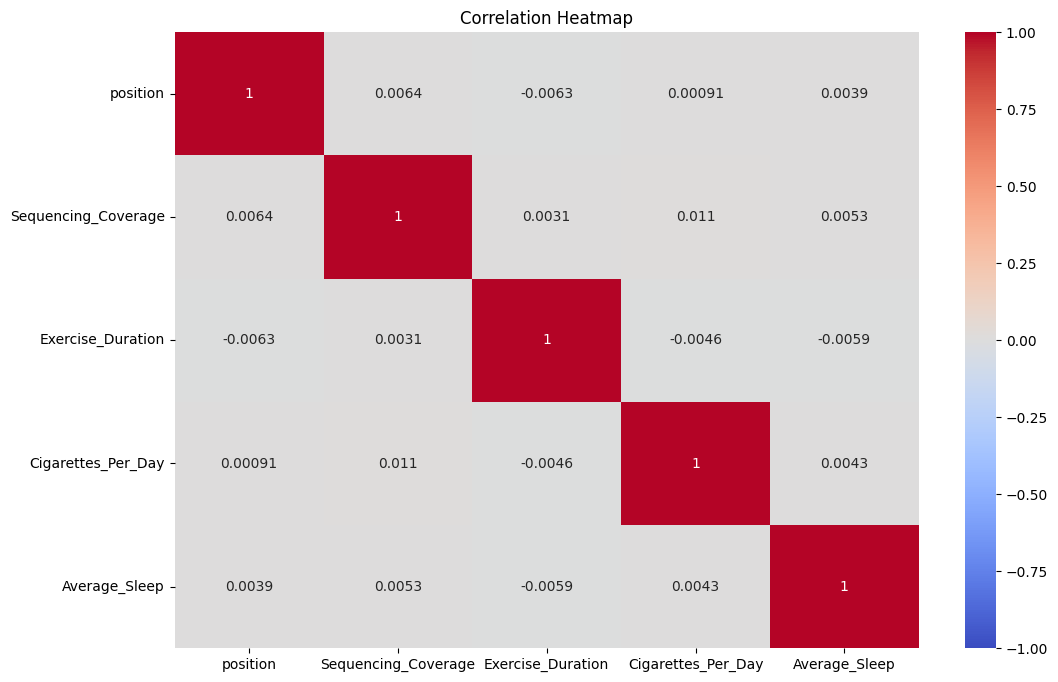

In [31]:
correlation_matrix = subset_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Bivariate Analysis

### Numerical vs. Categorical:

- How does Average_Sleep vary with disease_status?


- How does Exercise_Duration vary with disease_status?

### Categorical vs. Categorical:

- How does Alcohol_Use relate to disease_status?

- How does Tobacco_Use relate to disease_status?

- How does Stress_Level relate to disease_status

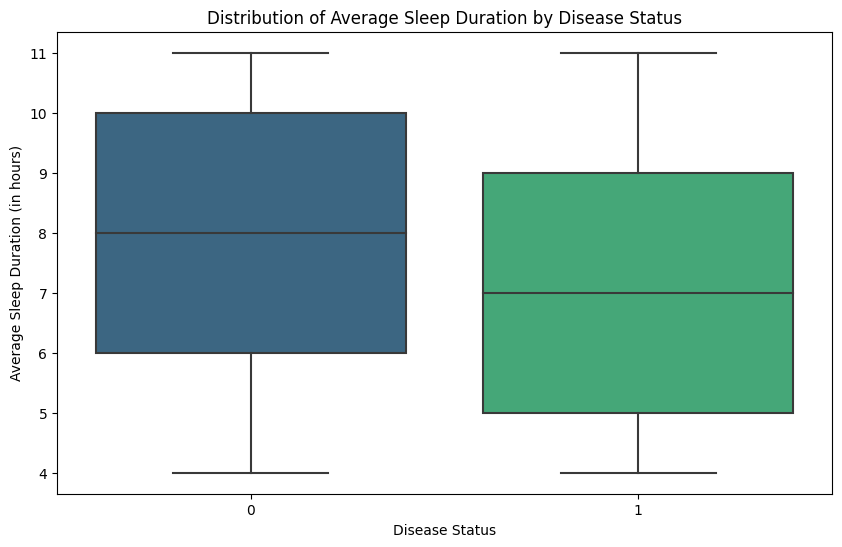

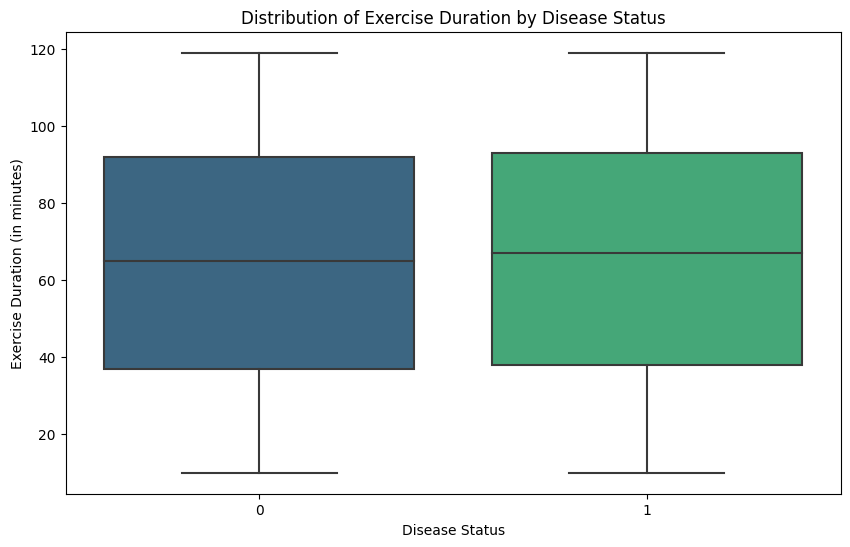

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, x='disease_status', y='Average_Sleep', palette="viridis")
plt.title('Distribution of Average Sleep Duration by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Average Sleep Duration (in hours)')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, x='disease_status', y='Exercise_Duration', palette="viridis")
plt.title('Distribution of Exercise Duration by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Exercise Duration (in minutes)')
plt.show()

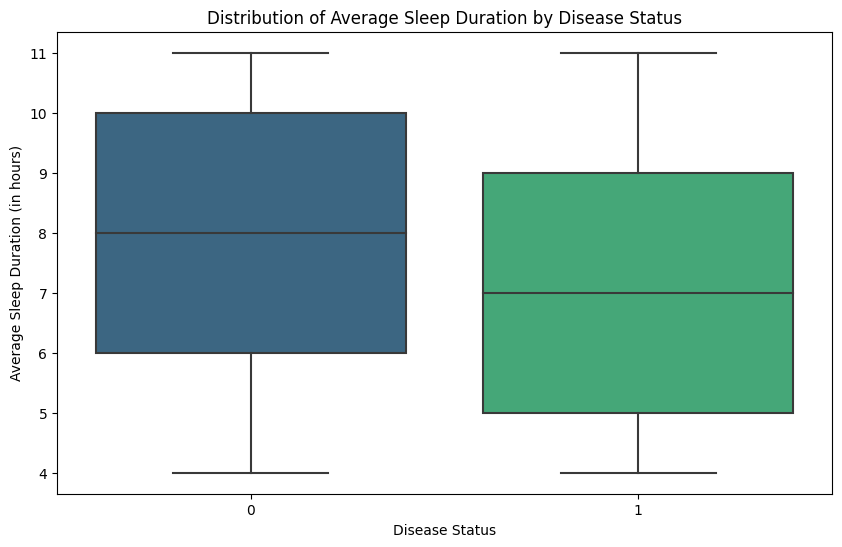

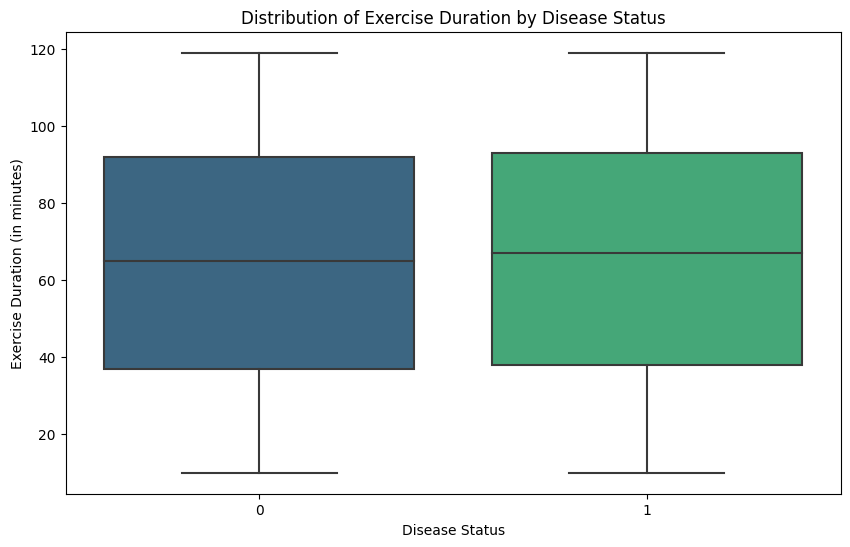

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, x='disease_status', y='Average_Sleep', palette="viridis")
plt.title('Distribution of Average Sleep Duration by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Average Sleep Duration (in hours)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_df, x='disease_status', y='Exercise_Duration', palette="viridis")
plt.title('Distribution of Exercise Duration by Disease Status')
plt.xlabel('Disease Status')
plt.ylabel('Exercise Duration (in minutes)')
plt.show()


<Figure size 1000x600 with 0 Axes>

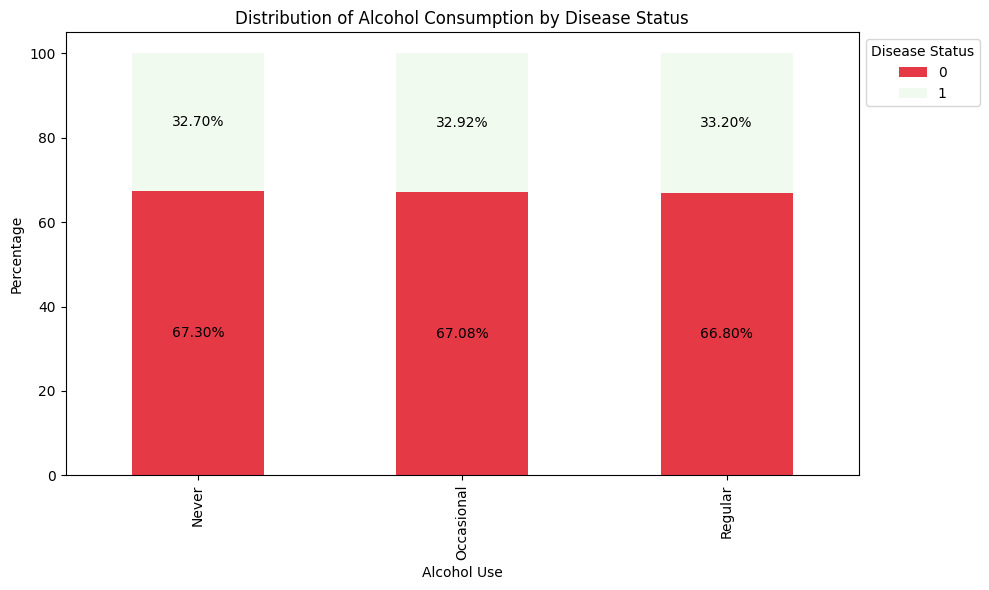

In [45]:
plt.figure(figsize=(10, 6))
ct_alcohol = pd.crosstab(df['Alcohol_Use'], subset_df['disease_status'], normalize='index') * 100
ax = ct_alcohol.plot(kind='bar', stacked=True, color=['#E63946', '#F1FAEE'], figsize=(10, 6))
plt.title('Distribution of Alcohol Consumption by Disease Status')
plt.ylabel('Percentage')
plt.xlabel('Alcohol Use')
plt.legend(title='Disease Status', loc='upper left', bbox_to_anchor=(1, 1))

# Adding percentages on the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

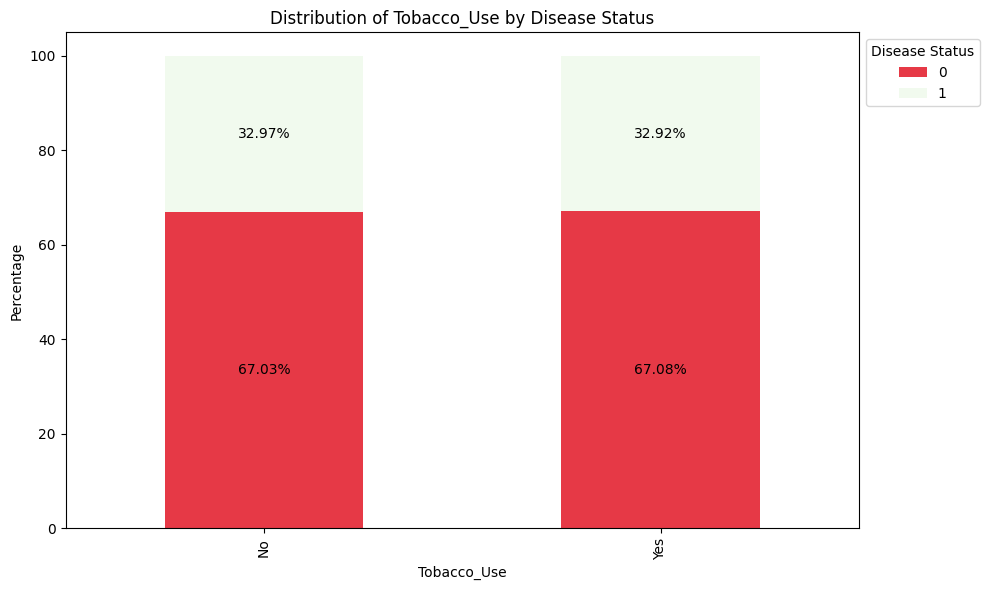

<Figure size 1000x600 with 0 Axes>

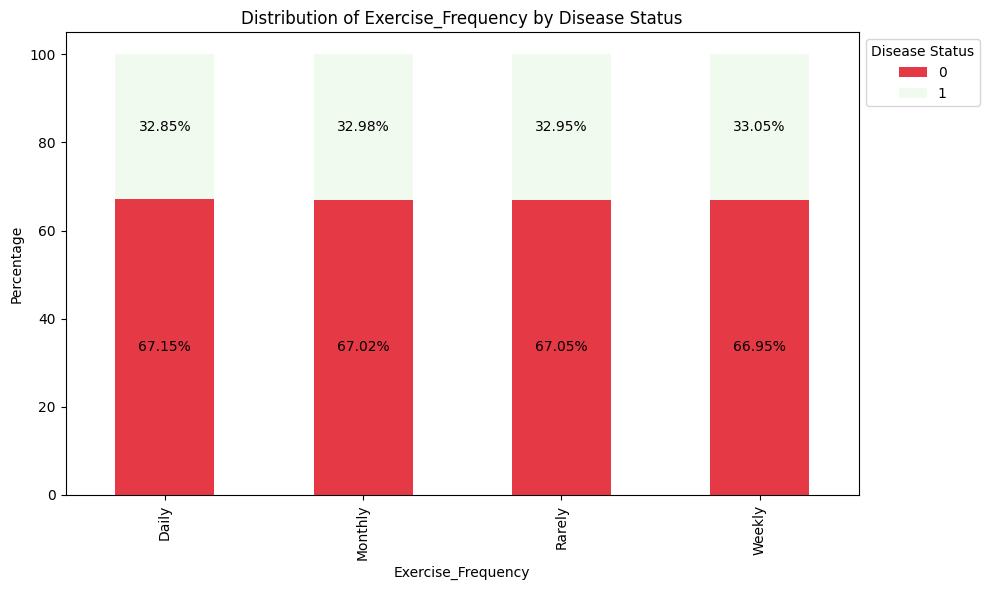

<Figure size 1000x600 with 0 Axes>

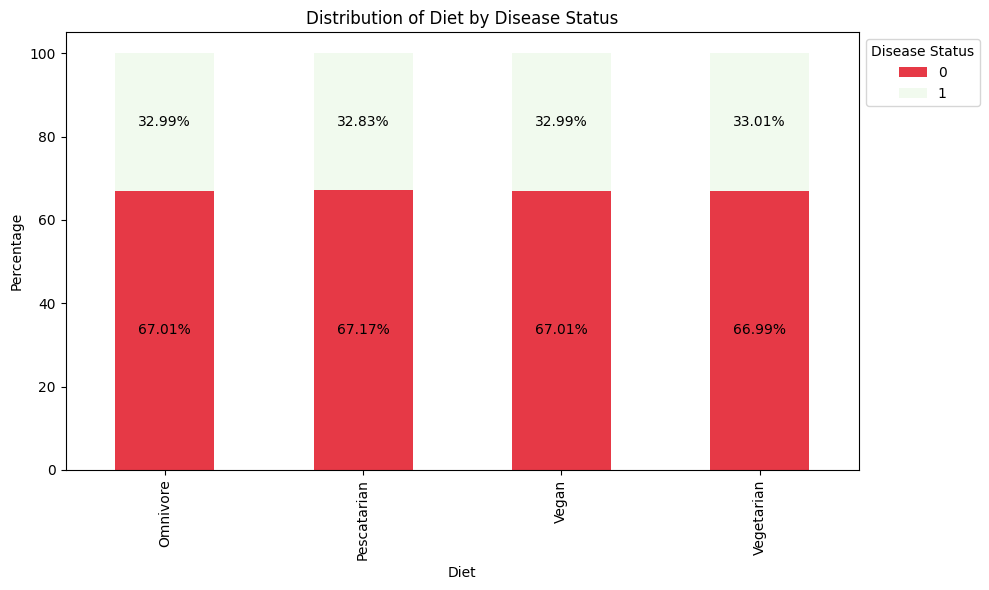

<Figure size 1000x600 with 0 Axes>

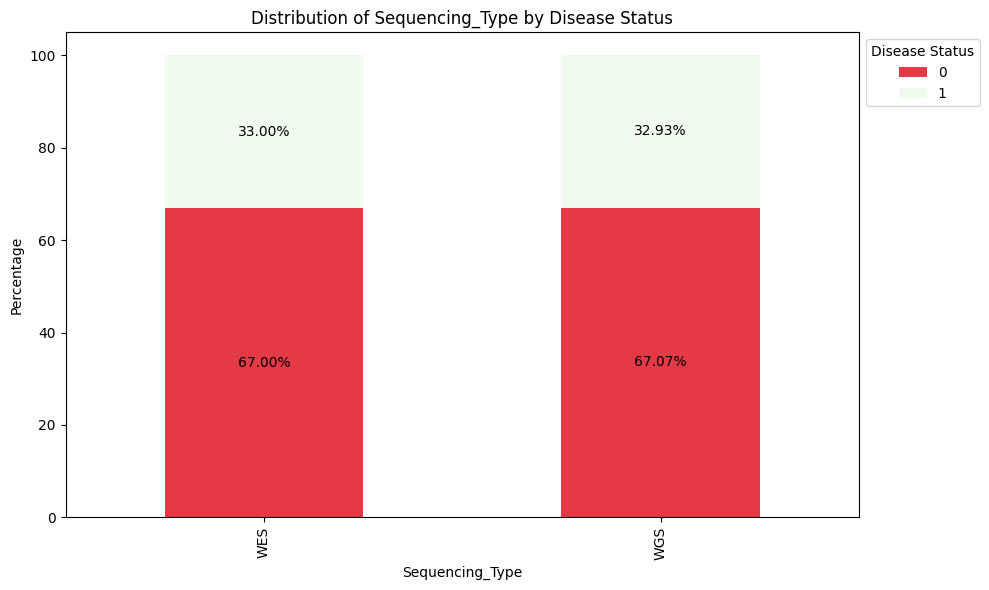

<Figure size 1000x600 with 0 Axes>

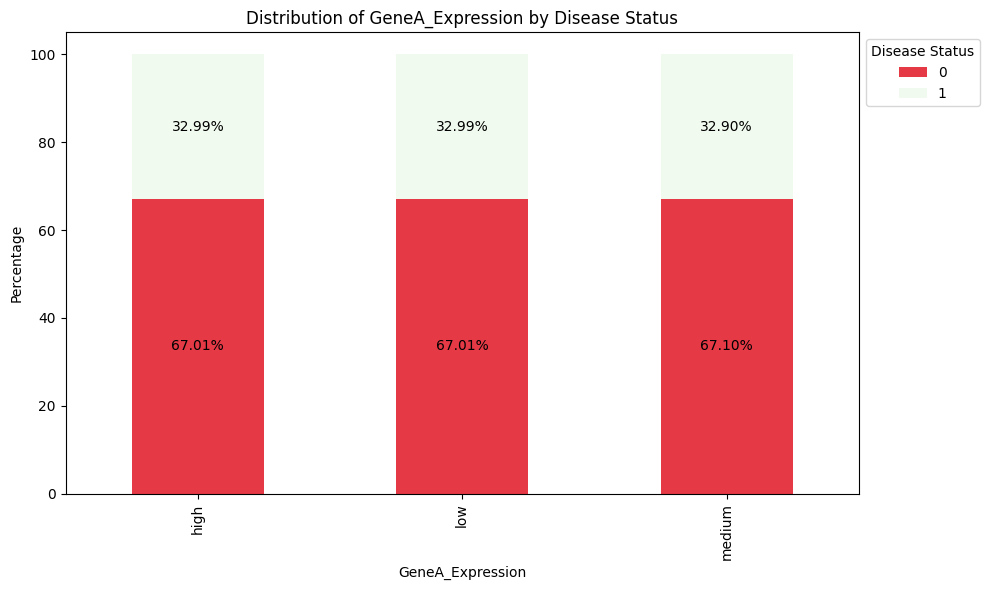

<Figure size 1000x600 with 0 Axes>

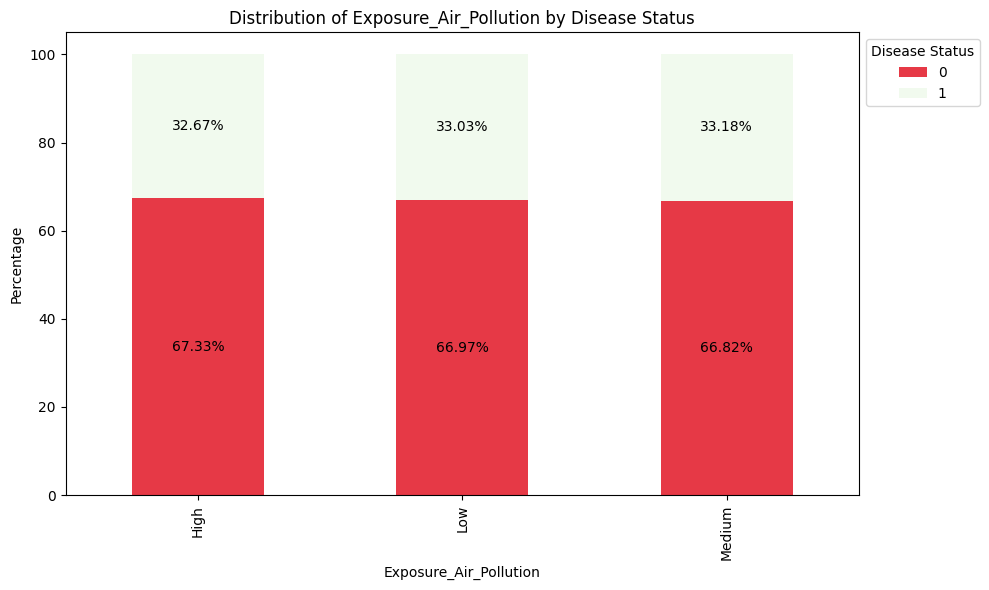

<Figure size 1000x600 with 0 Axes>

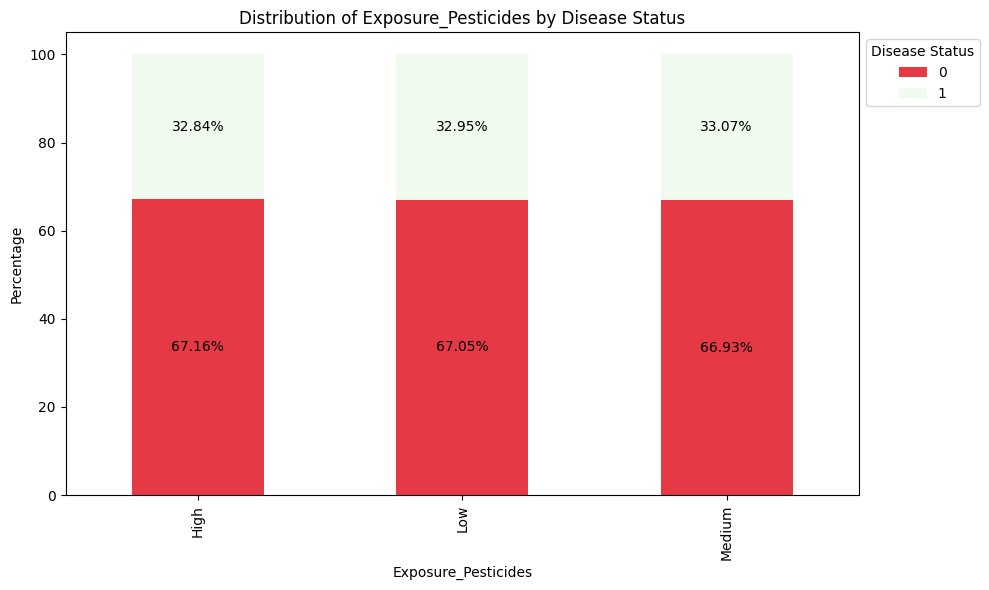

<Figure size 1000x600 with 0 Axes>

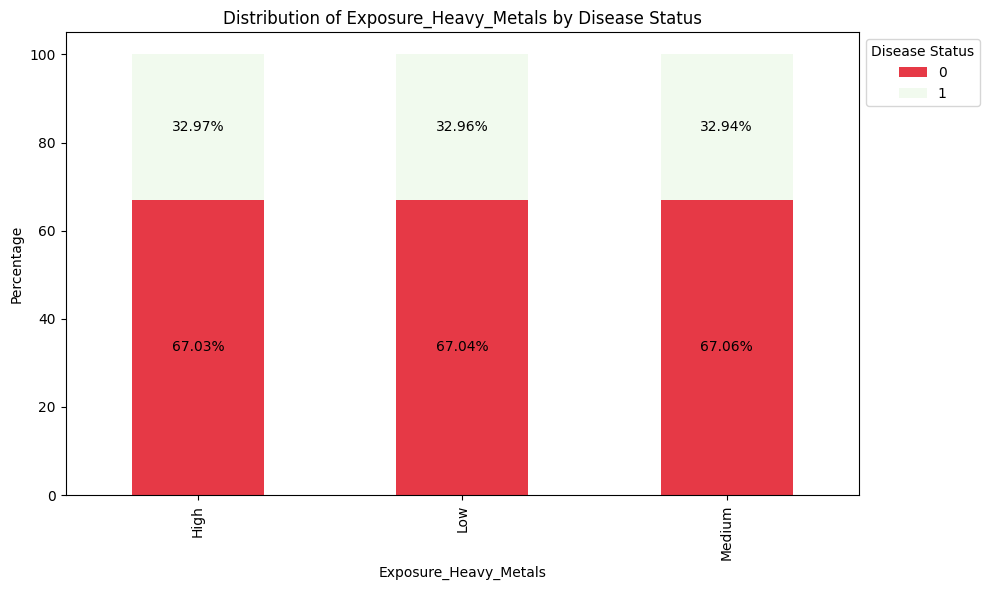

<Figure size 1000x600 with 0 Axes>

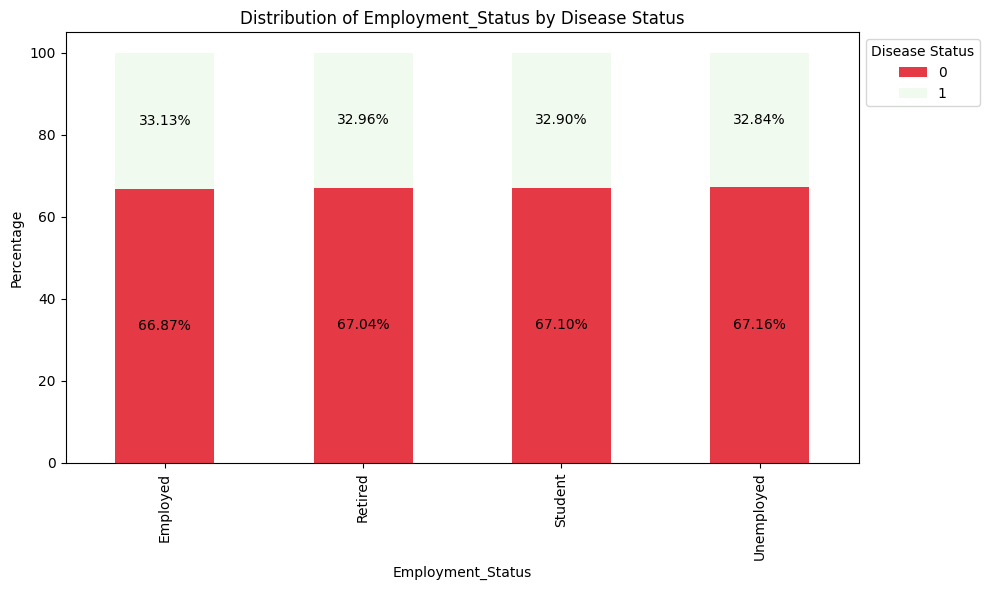

<Figure size 1000x600 with 0 Axes>

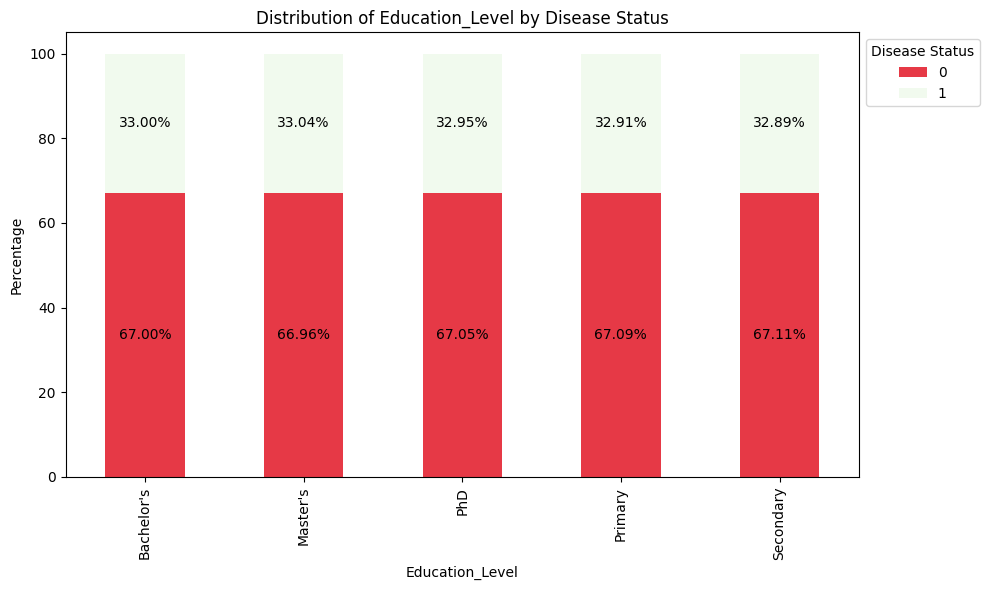

<Figure size 1000x600 with 0 Axes>

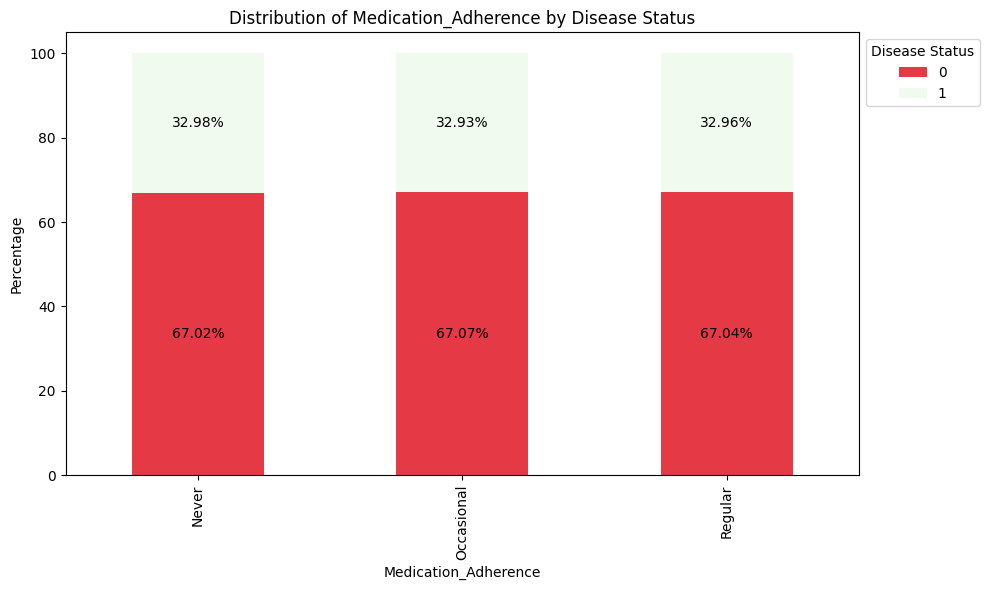

In [48]:
def plot_column_vs_disease_status(column_name, subset_df):
    plt.figure(figsize=(10, 6))
    ct = pd.crosstab(subset_df[column_name], subset_df['disease_status'], normalize='index') * 100
    ax = ct.plot(kind='bar', stacked=True, color=['#E63946', '#F1FAEE'], figsize=(10, 6))
    plt.title(f'Distribution of {column_name} by Disease Status')
    plt.ylabel('Percentage')
    plt.xlabel(column_name)
    plt.legend(title='Disease Status', loc='upper left', bbox_to_anchor=(1, 1))

    # Adding percentages on the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', color='black')

    plt.tight_layout()
    plt.show()

# List of columns to visualize against disease_status
columns_to_plot = [
    'Tobacco_Use',
    'Exercise_Frequency',
    'Diet',
    'Sequencing_Type',
    'GeneA_Expression',
    'Exposure_Air_Pollution',
    'Exposure_Pesticides',
    'Exposure_Heavy_Metals',
    'Employment_Status',
    'Education_Level',
    'Medication_Adherence'
]

# Generate the visualizations
for col in columns_to_plot:
    plot_column_vs_disease_status(col, df)

In [55]:
subset_df['disease_status'].value_counts()

disease_status
0    6706
1    3294
Name: count, dtype: int64

# Machine Learning on "disease status"

In [59]:
subset_df['disease_status'] = subset_df['disease_status'].astype('category')

In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = subset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'disease_status' is in the list before attempting to remove it
if 'disease_status' in categorical_cols:
    categorical_cols.remove('disease_status')

numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data again (as we changed the data types earlier)
X = subset_df.drop('disease_status', axis=1)
y = subset_df['disease_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((8000, 8868), (2000, 8868))

In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Adjusted models with the 'class_weight' parameter
models_adjusted = {
    'Logistic Regression': LogisticRegression(max_iter=10000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, class_weight='balanced'),
    'Neural Network': MLPClassifier(max_iter=10000)
}

# Execute the model training and evaluation pipeline for adjusted models
results_adjusted = {}
for name, model in models_adjusted.items():
    # Creating pipeline: Preprocessor -> Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred = pipeline.predict(X_test)
    
    # Storing results
    results_adjusted[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

results_adjusted_df = pd.DataFrame(results_adjusted).transpose()
results_adjusted_df


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.5790,0.347705,0.401284,0.372578
Random Forest,0.6880,0.333333,0.001605,0.003195
Gradient Boosting,0.6885,0.500000,0.062600,0.111270
SVM,0.5920,0.361946,0.406100,0.382753
Neural Network,0.6015,0.332046,0.276083,0.301490


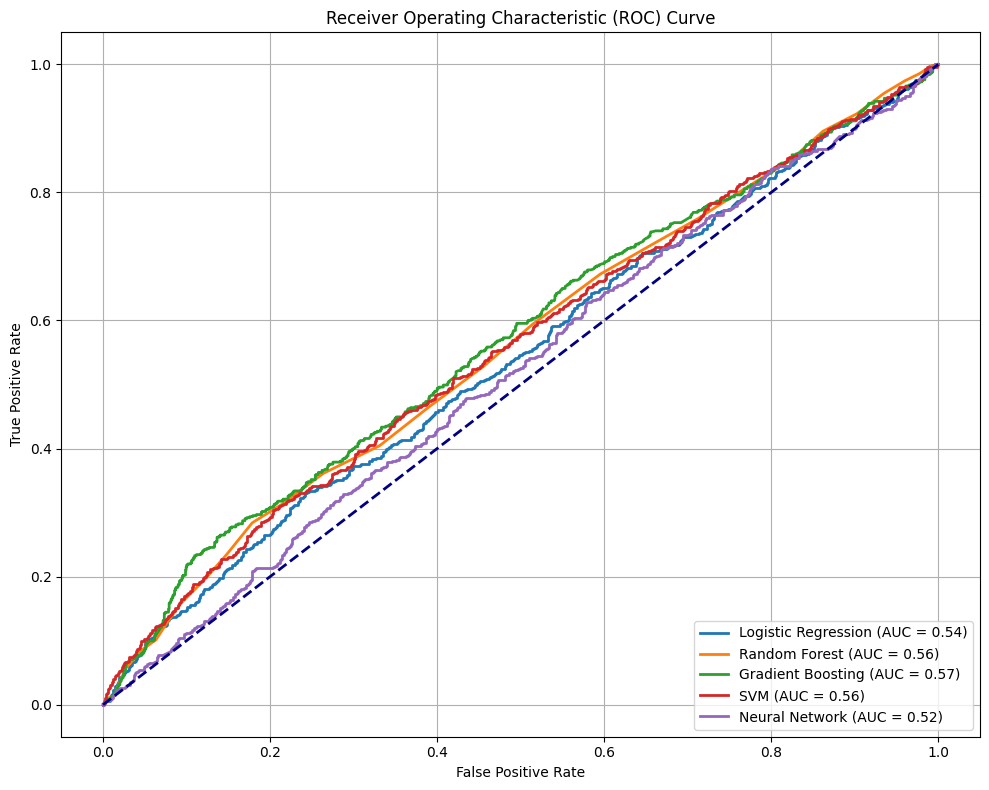

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Dictionary to store ROC curve values
roc_values = {}

# Plotting ROC curve for each model
plt.figure(figsize=(10, 8))

for name, model in models_adjusted.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Obtain probability estimates for positive class
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    roc_values[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    
    # Plotting ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plotting the diagonal line (represents random guessing)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Medication Response Prediction

In [74]:
subset_df['Aspirin_Response'].value_counts()

Aspirin_Response
Increased Sensitivity    3355
Normal Response          3337
Reduced Sensitivity      3308
Name: count, dtype: int64

In [75]:
subset_df['Atorvastatin_Response'].value_counts()

Atorvastatin_Response
Reduced Sensitivity      3419
Normal Response          3330
Increased Sensitivity    3251
Name: count, dtype: int64

In [76]:
subset_df['Lisinopril_Response'].value_counts()

Lisinopril_Response
Normal Response          3374
Reduced Sensitivity      3359
Increased Sensitivity    3267
Name: count, dtype: int64

In [77]:
subset_df['Metformin_Response'].value_counts()

Metformin_Response
Increased Sensitivity    3364
Reduced Sensitivity      3354
Normal Response          3282
Name: count, dtype: int64

In [81]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   # rsid                  10000 non-null  object  
 1   chromosome              10000 non-null  category
 2   position                10000 non-null  float64 
 3   genotype                10000 non-null  category
 4   disease_status          10000 non-null  category
 5   Sequencing_Type         10000 non-null  category
 6   Sequencing_Coverage     10000 non-null  float64 
 7   GeneA_Expression        10000 non-null  category
 8   GeneB_Expression        10000 non-null  category
 9   GeneC_Expression        10000 non-null  category
 10  GeneD_Expression        10000 non-null  category
 11  GeneE_Expression        10000 non-null  category
 12  Medical_History         10000 non-null  object  
 13  Current_Medications     10000 non-null  object  
 14  Allergies              

## Impact of Aspirin

In [89]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = subset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'disease_status' is in the list before attempting to remove it
if 'Aspirin_Response' in categorical_cols:
    categorical_cols.remove('Aspirin_Response')

numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data again (as we changed the data types earlier)
X = subset_df.drop('Aspirin_Response', axis=1)
y = subset_df['Aspirin_Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((8000, 8867), (2000, 8867))

In [93]:
# Models for multi-class classification
models_medi = {
    'Logistic Regression': LogisticRegression(max_iter=10000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, decision_function_shape='ovr'),
    'Neural Network': MLPClassifier(max_iter=10000)
}

# Execute the model training and evaluation pipeline for medication response prediction
results_medi_aspirin = {}
for name, model in models_medi.items():
    # Creating pipeline: Preprocessor -> Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred_medi = pipeline.predict(X_train)
    
    # Storing results
    results_medi_aspirin[name] = {
        'Accuracy': accuracy_score(y_train, y_pred_medi),
        'Precision': precision_score(y_train, y_pred_medi, average = 'macro'),
        'Recall': recall_score(y_train, y_pred_medi, average='macro'),
        'F1 Score': f1_score(y_train, y_pred_medi, average='macro')
    }

results_medi_aspirin_df = pd.DataFrame(results_medi_aspirin).transpose()
results_medi_aspirin_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.915250,0.915371,0.915202,0.915241
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.500250,0.506843,0.499582,0.495076
SVM,0.723875,0.726097,0.723650,0.723705
Neural Network,1.000000,1.000000,1.000000,1.000000


## Impact of Atorvastatin

In [97]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = subset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'disease_status' is in the list before attempting to remove it
if 'Atorvastatin_Response' in categorical_cols:
    categorical_cols.remove('Atorvastatin_Response')

numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data again (as we changed the data types earlier)
X = subset_df.drop('Atorvastatin_Response', axis=1)
y = subset_df['Atorvastatin_Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((8000, 8867), (2000, 8867))

In [98]:
# Models for multi-class classification
models_medi = {
    'Logistic Regression': LogisticRegression(max_iter=10000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, decision_function_shape='ovr'),
    'Neural Network': MLPClassifier(max_iter=10000)
}

# Execute the model training and evaluation pipeline for medication response prediction
results_medi_atorvastatin = {}
for name, model in models_medi.items():
    # Creating pipeline: Preprocessor -> Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred_astro = pipeline.predict(X_train)
    
    # Storing results
    results_medi_atorvastatin[name] = {
        'Accuracy': accuracy_score(y_train, y_pred_astro),
        'Precision': precision_score(y_train, y_pred_astro, average = 'macro'),
        'Recall': recall_score(y_train, y_pred_astro, average='macro'),
        'F1 Score': f1_score(y_train, y_pred_astro, average='macro')
    }

results_medi_atrovastin_df = pd.DataFrame(results_medi_atorvastatin).transpose()
results_medi_atrovastin_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.90875,0.909687,0.908292,0.908716
Random Forest,1.00000,1.000000,1.000000,1.000000
Gradient Boosting,0.50500,0.523447,0.501017,0.493501
SVM,0.72925,0.734594,0.727518,0.727977
Neural Network,1.00000,1.000000,1.000000,1.000000


## Impact of Lisinopril

In [99]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = subset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'disease_status' is in the list before attempting to remove it
if 'Lisinopril_Response' in categorical_cols:
    categorical_cols.remove('Lisinopril_Response')

numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data again (as we changed the data types earlier)
X = subset_df.drop('Lisinopril_Response', axis=1)
y = subset_df['Lisinopril_Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((8000, 8867), (2000, 8867))

In [100]:
# Models for multi-class classification
models_medi = {
    'Logistic Regression': LogisticRegression(max_iter=10000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, decision_function_shape='ovr'),
    'Neural Network': MLPClassifier(max_iter=10000)
}

# Execute the model training and evaluation pipeline for medication response prediction
results_medi_lisinopril = {}
for name, model in models_medi.items():
    # Creating pipeline: Preprocessor -> Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred_astro = pipeline.predict(X_train)
    
    # Storing results
    results_medi_lisinopril[name] = {
        'Accuracy': accuracy_score(y_train, y_pred_astro),
        'Precision': precision_score(y_train, y_pred_astro, average = 'macro'),
        'Recall': recall_score(y_train, y_pred_astro, average='macro'),
        'F1 Score': f1_score(y_train, y_pred_astro, average='macro')
    }

results_medi_lisinopril_df = pd.DataFrame(results_medi_lisinopril).transpose()
results_medi_lisinopril_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.909125,0.909177,0.909064,0.909097
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.507750,0.510463,0.507188,0.505973
SVM,0.725625,0.726633,0.725341,0.725313
Neural Network,1.000000,1.000000,1.000000,1.000000


In [101]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Identify categorical and numerical columns
categorical_cols = subset_df.select_dtypes(include=['object', 'category']).columns.tolist()

# Check if 'disease_status' is in the list before attempting to remove it
if 'Metformin_Response' in categorical_cols:
    categorical_cols.remove('Metformin_Response')

numerical_cols = subset_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data again (as we changed the data types earlier)
X = subset_df.drop('Metformin_Response', axis=1)
y = subset_df['Metformin_Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the training and testing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed.shape, X_test_transformed.shape

((8000, 8867), (2000, 8867))

In [102]:
# Models for multi-class classification
models_medi = {
    'Logistic Regression': LogisticRegression(max_iter=10000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, decision_function_shape='ovr'),
    'Neural Network': MLPClassifier(max_iter=10000)
}

# Execute the model training and evaluation pipeline for medication response prediction
results_medi_metformin = {}
for name, model in models_medi.items():
    # Creating pipeline: Preprocessor -> Model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Training the model
    pipeline.fit(X_train, y_train)
    
    # Predicting on test set
    y_pred_astro = pipeline.predict(X_train)
    
    # Storing results
    results_medi_metformin[name] = {
        'Accuracy': accuracy_score(y_train, y_pred_astro),
        'Precision': precision_score(y_train, y_pred_astro, average = 'macro'),
        'Recall': recall_score(y_train, y_pred_astro, average='macro'),
        'F1 Score': f1_score(y_train, y_pred_astro, average='macro')
    }

results_medi_metformin_df = pd.DataFrame(results_medi_metformin).transpose()
results_medi_metformin_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.922000,0.922033,0.921975,0.921996
Random Forest,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.500125,0.503569,0.499601,0.498042
SVM,0.727250,0.728093,0.727081,0.727149
Neural Network,1.000000,1.000000,1.000000,1.000000


In [103]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   # rsid                  10000 non-null  object  
 1   chromosome              10000 non-null  category
 2   position                10000 non-null  float64 
 3   genotype                10000 non-null  category
 4   disease_status          10000 non-null  category
 5   Sequencing_Type         10000 non-null  category
 6   Sequencing_Coverage     10000 non-null  float64 
 7   GeneA_Expression        10000 non-null  category
 8   GeneB_Expression        10000 non-null  category
 9   GeneC_Expression        10000 non-null  category
 10  GeneD_Expression        10000 non-null  category
 11  GeneE_Expression        10000 non-null  category
 12  Medical_History         10000 non-null  object  
 13  Current_Medications     10000 non-null  object  
 14  Allergies              

# Lifestyle Reccomendation

In [105]:
def lifestyle_recommendation(patient_data):
    recommendations = []

    if patient_data['Diet'] != 'Balanced':
        recommendations.append("Adopt a balanced diet.")
    if patient_data['Exercise_Frequency'] == 'Rarely':
        recommendations.append("Increase exercise frequency.")
    if patient_data['Tobacco_Use'] == 'Yes':
        recommendations.append("Consider quitting tobacco for better health.")
    if patient_data['Average_Sleep'] < 7:
        recommendations.append("Aim for 7-9 hours of sleep for optimal health.")
    if patient_data['Stress_Level'] == 'High':
        recommendations.append("Engage in relaxation techniques to manage stress.")

    return recommendations


In [107]:
sample_patient_data = df.iloc[1]
print(lifestyle_recommendation(sample_patient_data))

['Adopt a balanced diet.', 'Increase exercise frequency.']


In [108]:
sample_patient_data = df.iloc[0]
print(lifestyle_recommendation(sample_patient_data))

['Adopt a balanced diet.']
